In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import scipy as stats

In [4]:
!pip install fbprophet

  Retrying (Retry(total=4, connect=None, read=None, redirect=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.python.org', port=443): Read timed out. (read timeout=15)",)': /simple/pystan/
    100% |################################| 62.4MB 23kB/s  eta 0:00:01    73% |#######################         | 46.1MB 46.8MB/s eta 0:00:01
  Running setup.py bdist_wheel for fbprophet ... - \ | / - \ | / done
  Stored in directory: /home/nbuser/.cache/pip/wheels/43/f2/6c/5ed49d64b0aab1affc668d4555481db950fc4cc51658198951
Successfully built fbprophet
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [51]:
from fbprophet import Prophet

In [81]:
data = pd.read_csv('https://raw.githubusercontent.com/zpencerguy/work/master/Sales_by_day_April.csv', parse_dates=['Date'])
txn_data = pd.DataFrame(data[['Date','Txns']])
txn_data.rename(columns={'Date':'ds'},inplace=True)
#txn_data['y'] = np.log10(txn_data['Txns'])
#del txn_data['Txns']
#txn_data.sort_values(by=['Txns'],ascending=True)
txn_data.loc[(txn_data['ds'] == '2016-11-24')] = None
txn_data.loc[(txn_data['ds'] == '2015-11-26')] = None
txn_data.loc[(txn_data['ds'] == '2017-01-01')] = None
txn_data.loc[(txn_data['ds'] == '2016-01-01')] = None
txn_data.loc[(txn_data['ds'] == '2015-11-27')] = None
txn_data.loc[(txn_data['ds'] == '2016-11-25')] = None
txn_data.sort_values(by=['Txns'],ascending=False)
txn_data['y'] = np.log10(txn_data['Txns'])
del txn_data['Txns']
txn_data

,ds,y
0,2015-02-01,4.721918
1,2015-02-02,4.709092
2,2015-02-03,4.673058
3,2015-02-04,4.684917
4,2015-02-05,4.679173
5,2015-02-06,4.755204
6,2015-02-07,4.795623
7,2015-02-08,4.703704
8,2015-02-09,4.667985
9,2015-02-10,4.689362


In [48]:
data = pd.read_csv('https://raw.githubusercontent.com/zpencerguy/work/master/Sales_by_day_April.csv', parse_dates=['Date'])
sales_data = pd.DataFrame(data[['Date','Sales']])
sales_data.rename(columns={'Date':'ds'},inplace=True)
sales_data['y'] = np.log10(sales_data['Sales'])
del sales_data['Sales']
sales_data

,ds,y
0,2015-02-01,6.568502
1,2015-02-02,6.519151
2,2015-02-03,6.352087
3,2015-02-04,6.407623
4,2015-02-05,6.376327
5,2015-02-06,6.469397
6,2015-02-07,6.605302
7,2015-02-08,6.477032
8,2015-02-09,6.347584
9,2015-02-10,6.378210


In [49]:
events_15 = pd.read_csv('https://raw.githubusercontent.com/zpencerguy/work/master/2015_events.csv', parse_dates=['ds'])
events_16 = pd.read_csv('https://raw.githubusercontent.com/zpencerguy/work/master/2016_events.csv', parse_dates=['ds'])
events_17 = pd.read_csv('https://raw.githubusercontent.com/zpencerguy/work/master/2017_events.csv', parse_dates=['ds'])
events_future = pd.read_csv('https://raw.githubusercontent.com/zpencerguy/work/master/2017_events_future.csv', parse_dates=['ds'])
events_future2 = pd.read_csv('https://raw.githubusercontent.com/zpencerguy/work/master/2017_events_future2.csv', parse_dates=['ds'])


past_events = events_15.append(events_16)
all_past_events = past_events.append(events_17)
all_events = all_past_events.append(events_future)
all_events2 = all_past_events.append(events_future2)
all_events2

,ds,holiday,lower_window,upper_window
0,2015-03-11,scratch,0,7
1,2015-04-05,holiday,-2,2
2,2015-06-17,scratch,0,7
3,2015-07-04,holiday,-2,2
4,2015-07-15,scratch,0,7
5,2015-08-12,scratch,0,7
6,2015-10-14,scratch,0,7
7,2015-11-11,scratch,0,7
8,2015-11-26,holiday,-2,2
9,2015-12-02,scratch,0,7


/home/nbuser/anaconda3_410/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1001: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1001: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


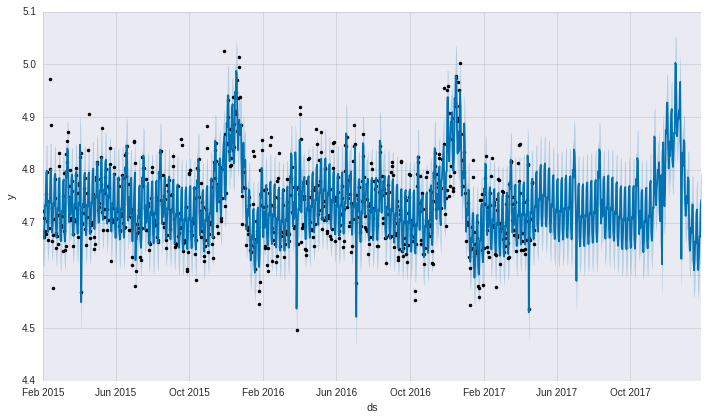

In [82]:
m = Prophet(holidays=all_events2)
m.fit(txn_data)
future = m.make_future_dataframe(periods=277)
txn_data_fcst = m.predict(future)
m.plot(txn_data_fcst)

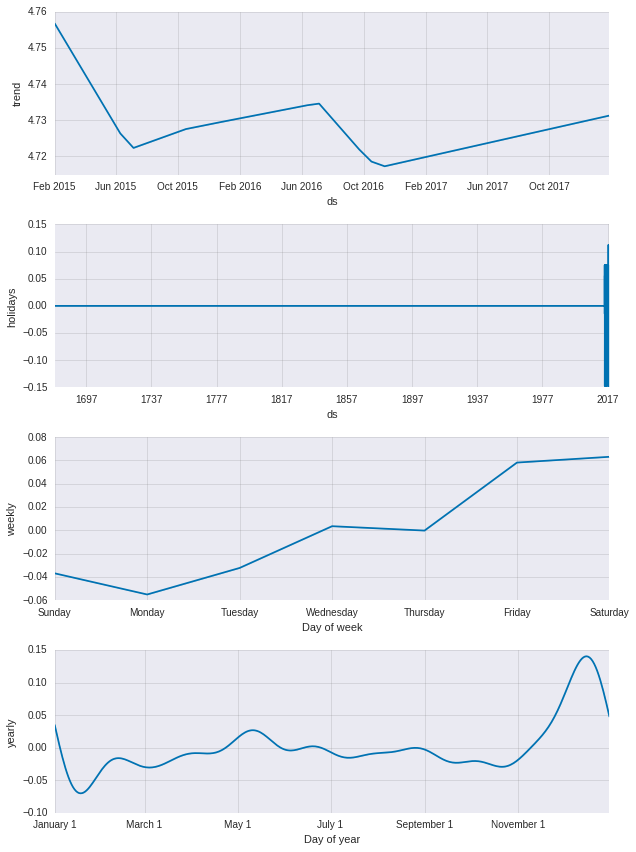

In [83]:
m.plot_components(txn_data_fcst)

In [85]:
txn_data_fcst
txn_data_fcst.to_csv('daily_txns_fcst_april.csv')